# **Importing the Required Libraries** 
# **Loading the CSV file in a dataframe**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("Crash_Severity_CE610.csv")

In [12]:
df

Severity_Type  Gender   Age  Time_of_Crash  Alcohol/Drug Use  \
0                  2       0  23.0              1                 1   
1                  0       1  26.0              2                 0   
2                  1       1  59.0              0                 0   
3                  0       1  53.0              0                 1   
4                  0       1  21.0              3                 0   
...              ...     ...   ...            ...               ...   
36168              1       1  20.0              1                 0   
36169              0       1  33.0              2                 0   
36170              1       1  16.0              3                 0   
36171              0       0  20.0              0                 0   
36172              0       1  34.0              0                 0   

       Violation_Type_Aggressive Driving  Violation_Type_Distracted Behavior  \
0                                      0                                   1   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   
...                                  ...                                 ...   
36168                                  0                                   0   
36169                                  0                                   0   
36170                                  0                                   0   
36171                                  0                                   0   
36172                                  0                                   0   

       Violation_Type_Failed to Yield Right of Way  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
36168                                            0   
36169                                            0   
36170                                            0   
36171                                            0   
36172                                            0   

       Violation_Type_Lane Violation  Violation_Type_Overspeeding  \
0                                  0                            0   
1                                  0                            0   
2                                  1                            0   
3                                  0                            1   
4                                  0                            1   
...                              ...                          ...   
36168                              0                            0   
36169                              0                            0   
36170                              0                            1   
36171                              0                            1   
36172                              0                            1   

       Violation_Type_Signal/Sign Violation  Violation_Type_Turning Violation  \
0                                         0                                 0   
1                                         0                                 1   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   
...                                     ...                               ...   
36168                                     1                                 0   
36169                                     1                        

# **Correlation Test**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = df.corr()

print(correlation_matrix)

                                             Severity_Type    Gender  \
Severity_Type                                     1.000000  0.002743   
Gender                                            0.002743  1.000000   
Age                                               0.010907  0.027027   
Time_of_Crash                                    -0.004223 -0.017459   
Alcohol/Drug Use                                  0.063966  0.075565   
Violation_Type_Aggressive Driving                -0.023516  0.001331   
Violation_Type_Distracted Behavior               -0.005177 -0.009706   
Violation_Type_Failed to Yield Right of Way       0.104016 -0.050774   
Violation_Type_Lane Violation                    -0.112576  0.017747   
Violation_Type_Overspeeding                      -0.046000  0.044556   
Violation_Type_Signal/Sign Violation              0.106527 -0.011974   
Violation_Type_Turning Violation                 -0.030896 -0.003549   
Collision_Type_Angle                              0.057254 -0.02

### *Visualize Correlation*

C:\Anaconda\envs\CE610\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9678 (\N{BULLSEYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\CE610\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9673 (\N{FISHEYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


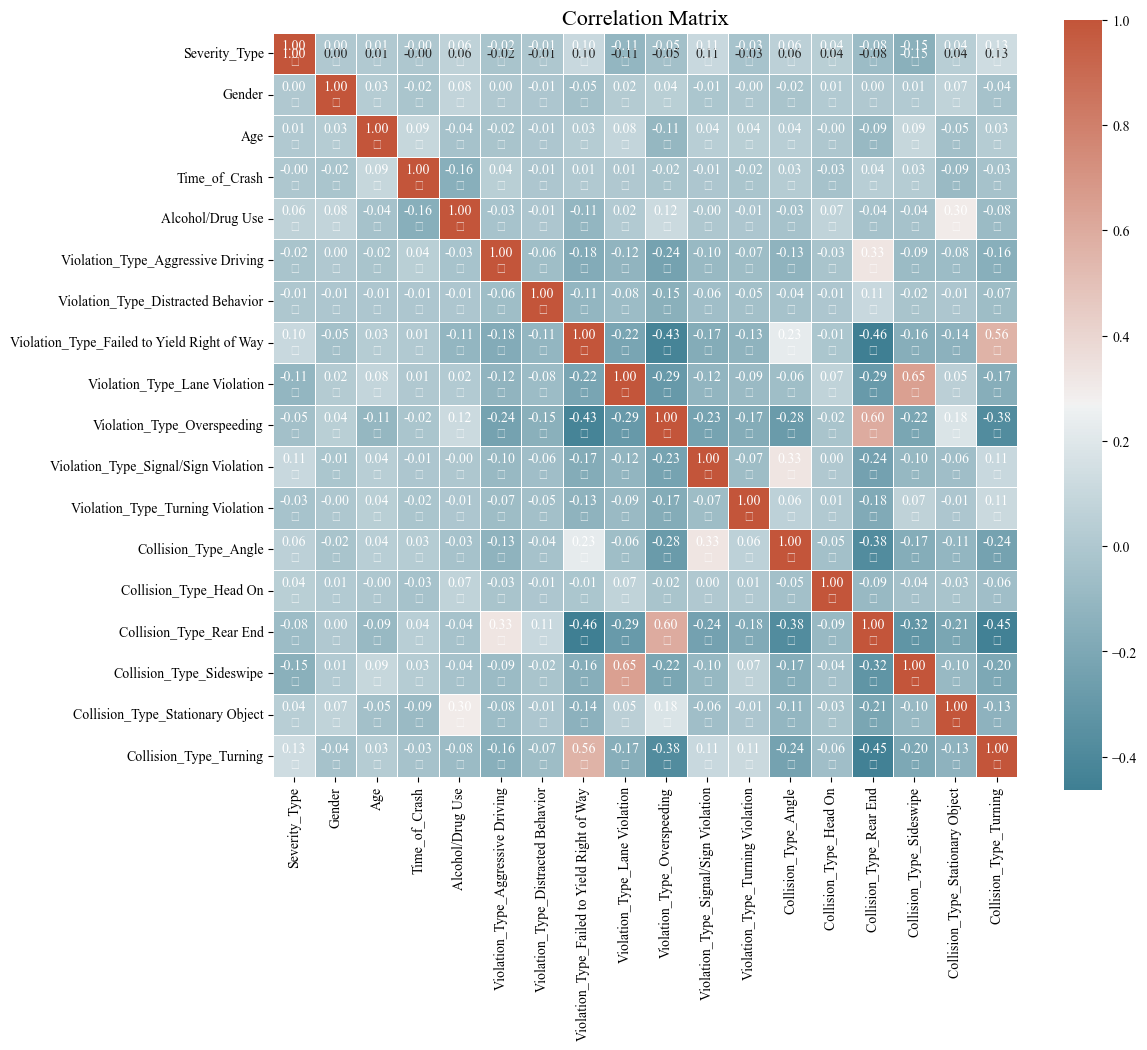

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, square=True)

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        text = heatmap.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                           ha='center', va='center', color='black')
        # Add color-coding for positive and negative correlations
        if correlation_matrix.iloc[i, j] < 0:
            text.set_text(text.get_text() + '\n◉')
            text.set_color('white')
        elif correlation_matrix.iloc[i, j] > 0:
            text.set_text(text.get_text() + '\n◎')
            text.set_color('white')

plt.title("Correlation Matrix", fontsize=16)

plt.show()

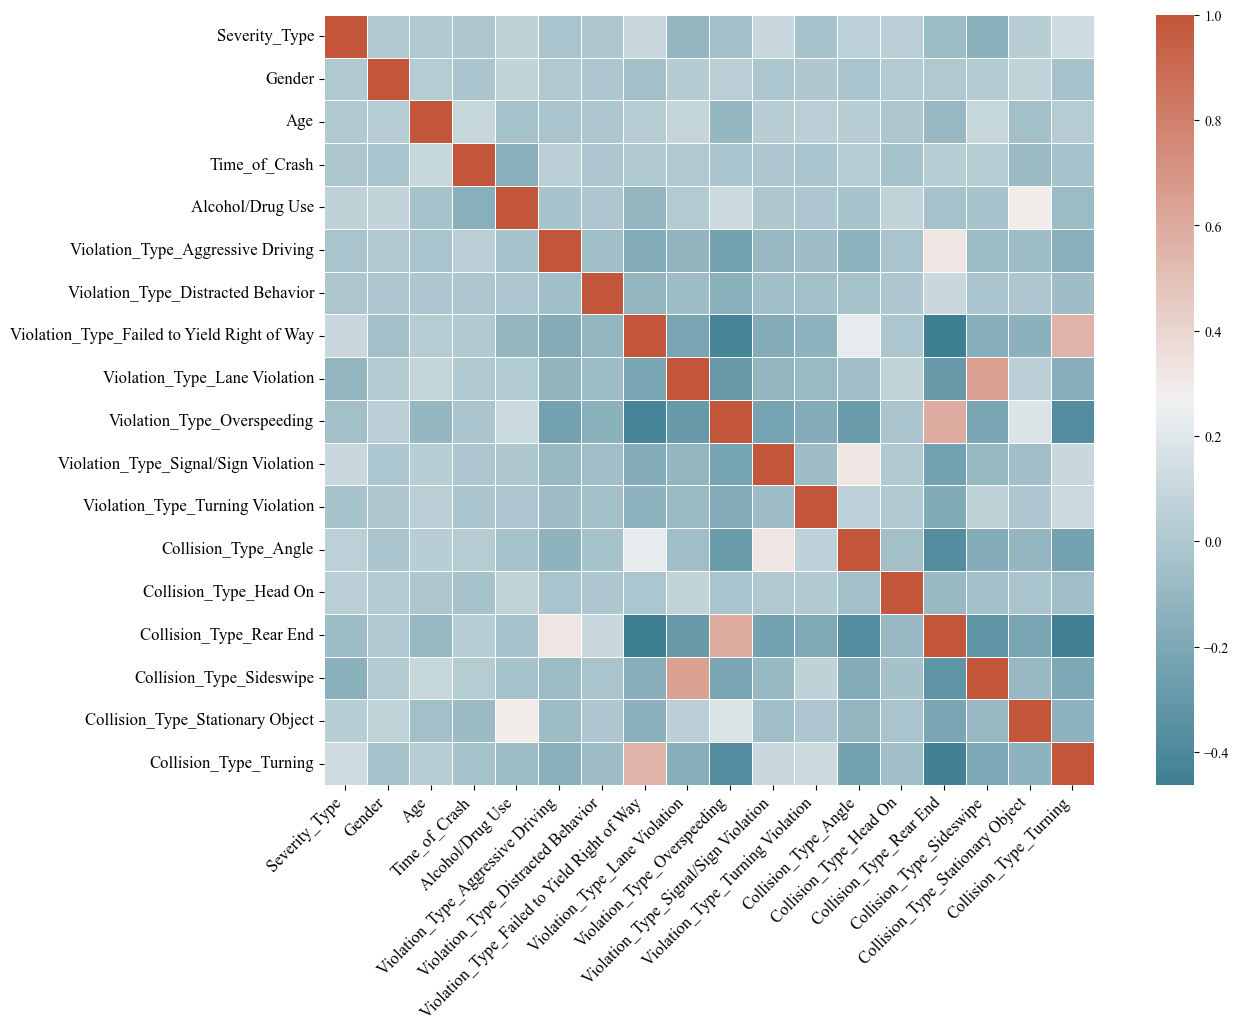

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='Times New Roman')

correlation_matrix = df.corr()

plt.figure(figsize=(16, 10))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(correlation_matrix, cmap=cmap, linewidths=0.5, square=True, annot=False)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, ha='right', fontsize=12)

plt.savefig("correlation_matrix.jpg", dpi=600, bbox_inches='tight')

plt.show()



### *“**Failure to Yield Right of Way**”, “**Rear-End Collisions**”, “**Turning Collision**” and “**Lane Violation**” have been eliminated from analysis*

### *After eliminating Variables*

### *Multinomial Logistic Regression Model with Feature Importance and Accuracy*

#### 65%/35% is the Test/Train Split

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


columns_to_drop = ["Violation_Type_Failed to Yield Right of Way", 
                   "Collision_Type_Rear End", 
                   "Collision_Type_Turning", 
                   "Violation_Type_Lane Violation"]

X = df.drop(["Severity_Type"] + columns_to_drop, axis=1)
y = df["Severity_Type"]

# Split the data into training and testing sets (65% training, 35% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# Display feature importance (coefficients for logistic regression)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print('\nFeature Importance:')
print(coefficients)


C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not ha

Accuracy: 0.67

Feature Importance:
                                 Feature  Coefficient
11              Collision_Type_Sideswipe     0.592420
4      Violation_Type_Aggressive Driving     0.322124
6            Violation_Type_Overspeeding     0.228046
5     Violation_Type_Distracted Behavior     0.174339
8       Violation_Type_Turning Violation     0.109928
9                   Collision_Type_Angle     0.007088
2                          Time_of_Crash    -0.005916
10                Collision_Type_Head On    -0.065553
7   Violation_Type_Signal/Sign Violation    -0.090585
12      Collision_Type_Stationary Object    -0.097784
0                                 Gender    -0.112282
1                                    Age    -0.145837
3                       Alcohol/Drug Use    -0.175244


C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

### Renaming columns with underscores

In [78]:
df_new = df.rename(columns={
    'Gender': 'Gender',
    'Age': 'Age',
    'Time_of_Crash': 'Time_of_Crash',
    'Alcohol/Drug Use': 'Alcohol_Drug_Use',
    'Violation_Type_Aggressive Driving': 'Violation_Type_Aggressive_Driving',
    'Violation_Type_Distracted Behavior': 'Violation_Type_Distracted_Behavior',
    'Violation_Type_Overspeeding': 'Violation_Type_Overspeeding',
    'Violation_Type_Signal/Sign Violation': 'Violation_Type_Signal_Sign_Violation',
    'Violation_Type_Turning Violation': 'Violation_Type_Turning_Violation',
    'Collision_Type_Angle': 'Collision_Type_Angle',
    'Collision_Type_Head On': 'Collision_Type_Head_On',
    'Collision_Type_Sideswipe': 'Collision_Type_Sideswipe',
    'Collision_Type_Stationary Object': 'Collision_Type_Stationary_Object',
    'Severity_Type': 'Severity_Type'
})


In [79]:
df_new

Severity_Type  Gender   Age  Time_of_Crash  Alcohol_Drug_Use  \
0                  2       0  23.0              1                 1   
1                  0       1  26.0              2                 0   
2                  1       1  59.0              0                 0   
3                  0       1  53.0              0                 1   
4                  0       1  21.0              3                 0   
...              ...     ...   ...            ...               ...   
36168              1       1  20.0              1                 0   
36169              0       1  33.0              2                 0   
36170              1       1  16.0              3                 0   
36171              0       0  20.0              0                 0   
36172              0       1  34.0              0                 0   

       Violation_Type_Aggressive_Driving  Violation_Type_Distracted_Behavior  \
0                                      0                                   1   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   
...                                  ...                                 ...   
36168                                  0                                   0   
36169                                  0                                   0   
36170                                  0                                   0   
36171                                  0                                   0   
36172                                  0                                   0   

       Violation_Type_Failed to Yield Right of Way  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
36168                                            0   
36169                                            0   
36170                                            0   
36171                                            0   
36172                                            0   

       Violation_Type_Lane Violation  Violation_Type_Overspeeding  \
0                                  0                            0   
1                                  0                            0   
2                                  1                            0   
3                                  0                            1   
4                                  0                            1   
...                              ...                          ...   
36168                              0                            0   
36169                              0                            0   
36170                              0                            1   
36171                              0                            1   
36172                              0                            1   

       Violation_Type_Signal_Sign_Violation  Violation_Type_Turning_Violation  \
0                                         0                                 0   
1                                         0                                 1   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   
...                                     ...                               ...   
36168                                     1                                 0   
36169                                     1                        

In [86]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import patsy

# Drop specific columns from X
columns_to_drop = ["Violation_Type_Failed to Yield Right of Way", 
                   "Collision_Type_Rear End", 
                   "Collision_Type_Turning", 
                   "Violation_Type_Lane Violation"]

# Assuming df_new is your original dataframe
X = df_new.drop(["Severity_Type"] + columns_to_drop, axis=1)
y = df_new["Severity_Type"]

# Split the data into training and testing sets (65% training, 35% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Standardize the features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a design matrix with automatic treatment encoding
formula = "Gender + Age + C(Time_of_Crash) + C(Alcohol_Drug_Use) + C(Violation_Type_Aggressive_Driving) + C(Violation_Type_Distracted_Behavior) + C(Violation_Type_Overspeeding) + C(Violation_Type_Signal_Sign_Violation) + C(Violation_Type_Turning_Violation) + C(Collision_Type_Angle) + C(Collision_Type_Head_On) + C(Collision_Type_Sideswipe) + C(Collision_Type_Stationary_Object)"

# Create a design matrix
X_train_patsy = patsy.dmatrix(formula, data=X_train, return_type='dataframe')

# Create a logistic regression model using statsmodels with the formula
logit_model = sm.MNLogit(y_train, sm.add_constant(X_train_patsy))  # Make sure to add the constant term
result = logit_model.fit()

# Display the summary with odds ratios and significance
print(result.summary())



C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not ha

         Current function value: 0.849168
         Iterations: 35


C:\Anaconda\envs\CE610\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:          Severity_Type   No. Observations:                23512
Model:                        MNLogit   Df Residuals:                    23448
Method:                           MLE   Df Model:                           60
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                 0.03848
Time:                        13:55:52   Log-Likelihood:                -19966.
converged:                      False   LL-Null:                       -20765.
Covariance Type:            nonrobust   LLR p-value:                1.744e-294
                             Severity_Type=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.9538      0.056    -17.094      0.000      -1.063      -0.844
C(Time_of_Crash)[T.1]        

In [87]:
# Validate the model on the test set
X_test_patsy = patsy.dmatrix(formula, data=X_test, return_type='dataframe')
y_pred = result.predict(sm.add_constant(X_test_patsy)).idxmax(axis=1)
accuracy = (y_pred == y_test).mean()
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.6652


### **Only the variables significant in both Severity Type 3 and 4 are taken as significant**

### **A new model is run using only these variables**

In [88]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import patsy

# Drop specific columns from X
columns_to_drop = ["Violation_Type_Failed to Yield Right of Way", 
                   "Collision_Type_Rear End", 
                   "Collision_Type_Turning", 
                   "Violation_Type_Lane Violation"]

# Assuming df_new is your original dataframe
X = df_new.drop(["Severity_Type"] + columns_to_drop, axis=1)
y = df_new["Severity_Type"]

# Split the data into training and testing sets (65% training, 35% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Standardize the features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a design matrix with automatic treatment encoding
formula = "Age + C(Alcohol_Drug_Use) + C(Collision_Type_Stationary_Object)"

# Create a design matrix
X_train_patsy = patsy.dmatrix(formula, data=X_train, return_type='dataframe')

# Create a logistic regression model using statsmodels with the formula
logit_model = sm.MNLogit(y_train, sm.add_constant(X_train_patsy))  # Make sure to add the constant term
result = logit_model.fit()

# Display the summary with odds ratios and significance
print(result.summary())



C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not ha

Optimization terminated successfully.
         Current function value: 0.878556
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:          Severity_Type   No. Observations:                23512
Model:                        MNLogit   Df Residuals:                    23496
Method:                           MLE   Df Model:                           12
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                0.005202
Time:                        13:59:49   Log-Likelihood:                -20657.
converged:                       True   LL-Null:                       -20765.
Covariance Type:            nonrobust   LLR p-value:                 1.575e-39
                         Severity_Type=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -1.2

### **ODDS RATIOS** can be calculated by taking the exp(coef)

In [92]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import patsy
from tabulate import tabulate
# Drop specific columns from X
columns_to_drop = ["Violation_Type_Failed to Yield Right of Way", 
                   "Collision_Type_Rear End", 
                   "Collision_Type_Turning", 
                   "Violation_Type_Lane Violation"]

# Assuming df_new is your original dataframe
X = df_new.drop(["Severity_Type"] + columns_to_drop, axis=1)
y = df_new["Severity_Type"]

# Split the data into training and testing sets (65% training, 35% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Standardize the features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a design matrix with automatic treatment encoding
formula = "Age + C(Alcohol_Drug_Use) + C(Collision_Type_Stationary_Object)"

# Create a design matrix
X_train_patsy = patsy.dmatrix(formula, data=X_train, return_type='dataframe')

# Create a logistic regression model using statsmodels with the formula
logit_model = sm.MNLogit(y_train, sm.add_constant(X_train_patsy))  # Make sure to add the constant term
result = logit_model.fit()

# Display the summary with odds ratios and significance
print(result.summary())

# Display the summary with odds ratios and significance using tabulate
table = result.summary().tables[1]
headers = table.data[0]
rows = table.data[1:]
data = [headers] + rows
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid"))

C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\envs\CE610\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not ha

Optimization terminated successfully.
         Current function value: 0.878556
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:          Severity_Type   No. Observations:                23512
Model:                        MNLogit   Df Residuals:                    23496
Method:                           MLE   Df Model:                           12
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                0.005202
Time:                        14:08:25   Log-Likelihood:                -20657.
converged:                       True   LL-Null:                       -20765.
Covariance Type:            nonrobust   LLR p-value:                 1.575e-39
                         Severity_Type=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -1.2

### Validation in Test set

In [98]:
# Validate the model on the test set
X_test_patsy = patsy.dmatrix(formula, data=X_test, return_type='dataframe')
y_pred = result.predict(sm.add_constant(X_test_patsy)).idxmax(axis=1)
accuracy = (y_pred == y_test).mean()
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.6749
